### PreCovid vs Post Covid Analysis

- Keeps base code that determines how turnstiles are combined and summed and how they're created into stations
- Import pre and post covid data from 1/4/2020 - 3/28/2020 and 1/29/2022-3/19/2022
- Create cells that isloate Feb 2020 and Feb 2021 to analyze pre and post covid data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv includes week 1/4/2020 - 3/28/2020 and 1/29/2022 - 3/19/2022
turnstiles_df = pd.read_csv('/Users/jennihawk/Desktop/Cliffbar/Pre_Covid_Work/pre_covid_turnstiles_cleaned.csv',parse_dates=['DATE','DATE_TIME'])
turnstiles_df.head()

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,03:00:00,REGULAR,7693605,2677444,2022-03-12 03:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,07:00:00,REGULAR,7693608,2677454,2022-03-12 07:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,11:00:00,REGULAR,7693627,2677547,2022-03-12 11:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,15:00:00,REGULAR,7693672,2677621,2022-03-12 15:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2022-03-12,19:00:00,REGULAR,7693730,2677683,2022-03-12 19:00:00


In [3]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145733 entries, 0 to 4145732
Data columns (total 13 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Unnamed: 0  int64         
 1   C/A         object        
 2   UNIT        object        
 3   SCP         object        
 4   STATION     object        
 5   LINENAME    object        
 6   DIVISION    object        
 7   DATE        datetime64[ns]
 8   TIME        object        
 9   DESC        object        
 10  ENTRIES     int64         
 11  EXITS       int64         
 12  DATE_TIME   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 411.2+ MB


### Look at a specific turnstile on a specific date

Looks like each row represents a turnstile (identified by a combination of the C/A, UNIT, SCP, and STATION columns) at a specific time -- approximately four hours apart. The ENTRIES column represents cumulative entries at that point in time.

In [4]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "01/29/2022")]

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1259513,1259514,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,03:00:00,REGULAR,537905,1925956,2022-01-29 03:00:00
1259514,1259515,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,07:00:00,REGULAR,537907,1925982,2022-01-29 07:00:00
1259515,1259516,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,11:00:00,REGULAR,537911,1926114,2022-01-29 11:00:00
1259516,1259517,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,15:00:00,REGULAR,537922,1926334,2022-01-29 15:00:00
1259517,1259518,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,19:00:00,REGULAR,537945,1926599,2022-01-29 19:00:00
1259518,1259519,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2022-01-29,23:00:00,REGULAR,537972,1926743,2022-01-29 23:00:00


The maximum ENTRIES value would occur at the last reading of the day. Since rows are listed in descending order of time, we can grab the last reading of the day (located at the top of the group) using the .first() DataFrame method.

In [5]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [6]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-12-28,7324295
1,A002,R051,02-00-00,59 ST,2019-12-29,7325192
2,A002,R051,02-00-00,59 ST,2019-12-30,7325799
3,A002,R051,02-00-00,59 ST,2019-12-31,7326977
4,A002,R051,02-00-00,59 ST,2020-01-01,7328037


### Turnstile Daily Entries
the number of new entries gained each day

In [7]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/4241375361.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [8]:
# NaT missing datetime values
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2019-12-28,7324295,NaT,NaN
1,A002,R051,02-00-00,59 ST,2019-12-29,7325192,2019-12-28,7324295.0
2,A002,R051,02-00-00,59 ST,2019-12-30,7325799,2019-12-29,7325192.0
3,A002,R051,02-00-00,59 ST,2019-12-31,7326977,2019-12-30,7325799.0
4,A002,R051,02-00-00,59 ST,2020-01-01,7328037,2019-12-31,7326977.0


In [9]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
692110,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-14,0,2022-03-13,0.0
692111,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-15,0,2022-03-14,0.0
692112,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-16,0,2022-03-15,0.0
692113,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-17,0,2022-03-16,0.0
692114,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-03-18,0,2022-03-17,0.0


In [10]:
# Dropping null NaT values in PREV_DATE. Because there's not a previous value for first row in dataframe. 
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [11]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-12-29,7325192,2019-12-28,7324295.0
2,A002,R051,02-00-00,59 ST,2019-12-30,7325799,2019-12-29,7325192.0
3,A002,R051,02-00-00,59 ST,2019-12-31,7326977,2019-12-30,7325799.0
4,A002,R051,02-00-00,59 ST,2020-01-01,7328037,2019-12-31,7326977.0
5,A002,R051,02-00-00,59 ST,2020-01-02,7328527,2020-01-01,7328037.0


### Interlude Reverse Entries
Look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [12]:
# Identifying counter is going backwards via entries that are less than previous entries
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
651,A002,R051,02-03-02,59 ST,2022-01-29,136720,2020-03-27,6540281.0
1588,A002,R051,02-06-00,59 ST,2020-02-14,922,2020-02-13,82665.0
2331,A006,R079,00-00-04,5 AV/59 ST,2022-01-29,146526,2020-03-27,7896368.0
2454,A006,R079,00-03-00,5 AV/59 ST,2020-03-11,76,2020-03-10,9437450.0
3591,A007,R079,01-06-03,5 AV/59 ST,2022-01-29,227228,2020-03-27,7831851.0


In [13]:
# Let's see how many stations have this problem? Individual turnstiles by station. 
# length is number of turnstiles that have problem because of how groupby is. 
# .size() means 48 rows in 57 strett that have this issue. 


(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-03-02  59 ST                1
             02-06-00  59 ST                1
A006   R079  00-00-04  5 AV/59 ST           1
             00-03-00  5 AV/59 ST           1
A007   R079  01-06-03  5 AV/59 ST           1
                                         ... 
R729   R292  00-00-01  BAYCHESTER AV        1
R730   R431  00-00-04  EASTCHSTER/DYRE    136
S101   R070  00-00-03  ST. GEORGE           1
             00-00-04  ST. GEORGE           1
TRAM2  R469  00-05-01  RIT-ROOSEVELT        1
Length: 990, dtype: int64

In [14]:
# my questions/clarifications:
# identify when there's a negative entry count <0
# identify a max - how many people can go through turnstile in 4 hour window

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        # my note: do this if count is going backwards
        # if counter is negative then make it a positive. The -counter makes it positive - yes, not intuitive. 
        # installed wrong - counters negative when should be positive.
        # when reset occurs it gets reset to zero. Resets at large number. Makes next if statement work. 
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        #for this row look at entries and prev entries and take lowest
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=15000)

In [15]:
# daily entries column added with code from above applied
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-12-29,7325192,2019-12-28,7324295.0,897.0
2,A002,R051,02-00-00,59 ST,2019-12-30,7325799,2019-12-29,7325192.0,607.0
3,A002,R051,02-00-00,59 ST,2019-12-31,7326977,2019-12-30,7325799.0,1178.0
4,A002,R051,02-00-00,59 ST,2020-01-01,7328037,2019-12-31,7326977.0,1060.0
5,A002,R051,02-00-00,59 ST,2020-01-02,7328527,2020-01-01,7328037.0,490.0


### Combine Turnstiles 
That fall within the same ControlArea/Unit/Station combo.
There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles -- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together. For each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby)

In [16]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2019-12-29,8263.0
1,A002,R051,59 ST,2019-12-30,6666.0
2,A002,R051,59 ST,2019-12-31,10986.0
3,A002,R051,59 ST,2020-01-01,9700.0
4,A002,R051,59 ST,2020-01-02,4873.0


### Create Daily Time Series for Each Station
by adding up all the turnstiles in a station

In [17]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2019-12-29,6065.0
1,1 AV,2019-12-30,4763.0
2,1 AV,2019-12-31,12931.0
3,1 AV,2020-01-01,14286.0
4,1 AV,2020-01-02,6109.0


### Create a chart with top ten stations for Feb 2020 

In [18]:
# select February 2020 rows
start_date = '2020-02-01'
end_date = '2020-02-29'
# Select DataFrame rows between two dates
mask = (station_daily['DATE'] >= start_date) & (station_daily['DATE'] <= end_date)
feb2020 = station_daily.loc[mask]
feb2020.head(4)

,STATION,DATE,DAILY_ENTRIES
34,1 AV,2020-02-01,18790.0
35,1 AV,2020-02-02,7341.0
36,1 AV,2020-02-03,5599.0
37,1 AV,2020-02-04,16988.0


In [19]:
# Feb 2020 grouped by station, sum of Daily Entries 
feb2020_sums = feb2020.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

feb2020_sums.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,3784922.0
1,GRD CNTRL-42 ST,3290770.0
2,34 ST-HERALD SQ,2901856.0
3,23 ST,2874137.0
4,42 ST-PORT AUTH,2462518.0
5,14 ST-UNION SQ,2379675.0
6,TIMES SQ-42 ST,2248539.0
7,FULTON ST,2233398.0
8,86 ST,2064123.0
9,125 ST,1927761.0


#### Feb 2020 Bottom TTL Line Top Ten Stations

In [20]:
feb2020total = feb2020_sums.loc[0 : 9,["DAILY_ENTRIES"]].sum(axis = 0)
feb2020total

DAILY_ENTRIES    26167699.0
dtype: float64

### Feb 2020 Plot Top Ten Stations

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/3485477614.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0, 0.5, 'Entries')

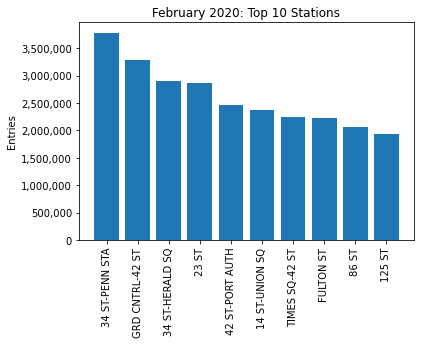

In [21]:
plt.bar(x=feb2020_sums['STATION'][:10], height=feb2020_sums['DAILY_ENTRIES'][:10])
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.title('February 2020: Top 10 Stations')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation=90)
plt.ylabel("Entries")
#plt.savefig('Feb2020Top10v3.png', dpi=300, bbox_inches="tight", transparent = True)  

### Feb 2022 Create a chart with top ten stations for

In [22]:
# select February 2022 rows
start_date = '2022-02-01'
end_date = '2022-02-28'
# Select DataFrame rows between two dates
mask = (station_daily['DATE'] >= start_date) & (station_daily['DATE'] <= end_date)
feb2022 = station_daily.loc[mask]
feb2022.head(10)

,STATION,DATE,DAILY_ENTRIES
93,1 AV,2022-02-01,7374.0
94,1 AV,2022-02-02,7397.0
95,1 AV,2022-02-03,9126.0
96,1 AV,2022-02-04,9237.0
97,1 AV,2022-02-05,9394.0
98,1 AV,2022-02-06,5674.0
99,1 AV,2022-02-07,4351.0
100,1 AV,2022-02-08,8521.0
101,1 AV,2022-02-09,9170.0
102,1 AV,2022-02-10,8945.0


In [23]:
# Feb 2022 grouped by station, sum of Daily Entries 
feb2022_sums = feb2022.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

feb2022_sums.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,1184088.0
1,34 ST-HERALD SQ,966343.0
2,GRD CNTRL-42 ST,942783.0
3,23 ST,911101.0
4,86 ST,887946.0
5,42 ST-PORT AUTH,833813.0
6,14 ST-UNION SQ,793204.0
7,125 ST,776425.0
8,TIMES SQ-42 ST,742206.0
9,FULTON ST,721972.0


#### Feb 2022 Bottom TTL Line Top Ten Stations

In [24]:
feb2022total = feb2022_sums.loc[0 : 9,["DAILY_ENTRIES"]].sum(axis = 0)
feb2022total

DAILY_ENTRIES    8759881.0
dtype: float64

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/1319192099.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


Text(0, 0.5, 'Entries')

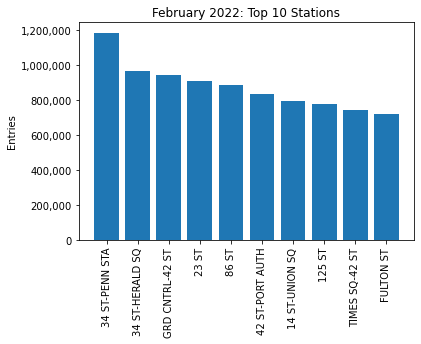

In [25]:
plt.bar(x=feb2022_sums['STATION'][:10], height=feb2022_sums['DAILY_ENTRIES'][:10])
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.title('February 2022: Top 10 Stations')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation=90)
plt.ylabel("Entries")
#plt.savefig('Feb2022Top10v3.png', dpi=300, bbox_inches="tight", transparent = True)  

### Determine Stations With the Highest Traffic During Reporting Period

In [26]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,12196343.0
1,GRD CNTRL-42 ST,10294483.0
2,34 ST-HERALD SQ,9422982.0
3,23 ST,8946241.0
4,42 ST-PORT AUTH,8091023.0
5,14 ST-UNION SQ,7628829.0
6,TIMES SQ-42 ST,7242625.0
7,FULTON ST,7162722.0
8,86 ST,7107503.0
9,125 ST,6625976.0


### Percent of Daily Entries by Station

In [27]:
station_totals['Percent'] = (station_totals['DAILY_ENTRIES'] / station_totals['DAILY_ENTRIES'].sum()) * 100
station_totals

,STATION,DAILY_ENTRIES,Percent
0,34 ST-PENN STA,12196343.0,2.599724
1,GRD CNTRL-42 ST,10294483.0,2.194331
2,34 ST-HERALD SQ,9422982.0,2.008566
3,23 ST,8946241.0,1.906945
4,42 ST-PORT AUTH,8091023.0,1.724651
...,...,...,...
373,ROCKAWAY PARK B,59497.0,0.012682
374,TOMPKINSVILLE,55793.0,0.011893
375,BEACH 98 ST,37977.0,0.008095
376,BROAD CHANNEL,35077.0,0.007477


In [28]:
# check the type that is in station_totals['Percent']
station_totals['Percent'].dtypes

dtype('float64')

In [29]:
# # This code because percent column was giving scientific notation. 
# station_totals['Percent'] = station_totals['Percent'].astype('float')
# station_totals['Percent'] = station_totals['Percent'].apply('{0:.2f}'.format)
# station_totals.head(10)

### Cumulative Sum of Percent  

In [30]:
percent_cumu = station_totals['Percent'].cumsum()
percent_cumu.head()

0     2.599724
1     4.794056
2     6.802621
3     8.709567
4    10.434217
Name: Percent, dtype: float64

In [31]:
station_totals['Percent_Cume'] = percent_cumu
station_totals.head(12)

,STATION,DAILY_ENTRIES,Percent,Percent_Cume
0,34 ST-PENN STA,12196343.0,2.599724,2.599724
1,GRD CNTRL-42 ST,10294483.0,2.194331,4.794056
2,34 ST-HERALD SQ,9422982.0,2.008566,6.802621
3,23 ST,8946241.0,1.906945,8.709567
4,42 ST-PORT AUTH,8091023.0,1.724651,10.434217
5,14 ST-UNION SQ,7628829.0,1.626131,12.060348
6,TIMES SQ-42 ST,7242625.0,1.543809,13.604158
7,FULTON ST,7162722.0,1.526778,15.130935
8,86 ST,7107503.0,1.515007,16.645943
9,125 ST,6625976.0,1.412367,18.058310


In [32]:
%matplotlib inline

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/1766598180.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

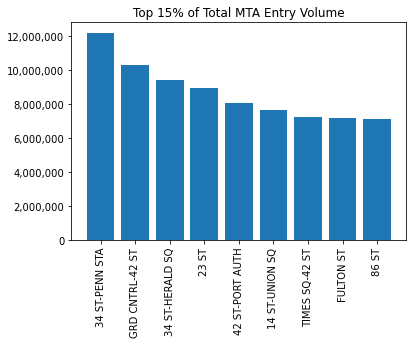

In [33]:
# Stations that represent 15% of total entry volume
plt.bar(x=station_totals['STATION'][:9], height=station_totals['DAILY_ENTRIES'][:9])
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.title('Top 15% of Total MTA Entry Volume')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xticks(rotation=90)

### Plot Daily Time Series For Single Turnstile
Select one turnstile (combination of [C/A, UNIT, SCP, STATION])
Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis
You can use the following as a starting point:

    plt.figure(figsize=(10,3))
    plt.plot(<days>,<entries>)

In [34]:
%matplotlib inline

In [35]:
# single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
# (turnstiles_daily["UNIT"] == "R080") & 
# (turnstiles_daily["SCP"] == "01-00-00") & 
# (turnstiles_daily["STATION"] == "57 ST-7 AV")]

# single_turnstile.head()

In [36]:
# plt.figure(figsize=(15,5))
# plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
# plt.ylabel('# of Entries')
# plt.xlabel('Date')
# plt.xticks(rotation=45)
# plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')


### Daily Time Series For a Station  

#### 57 Ave Station

In [37]:
station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()

,STATION,DATE,DAILY_ENTRIES
11676,57 ST-7 AV,2019-12-29,21314.0
11677,57 ST-7 AV,2019-12-30,16338.0
11678,57 ST-7 AV,2019-12-31,27550.0
11679,57 ST-7 AV,2020-01-01,22820.0
11680,57 ST-7 AV,2020-01-02,14557.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

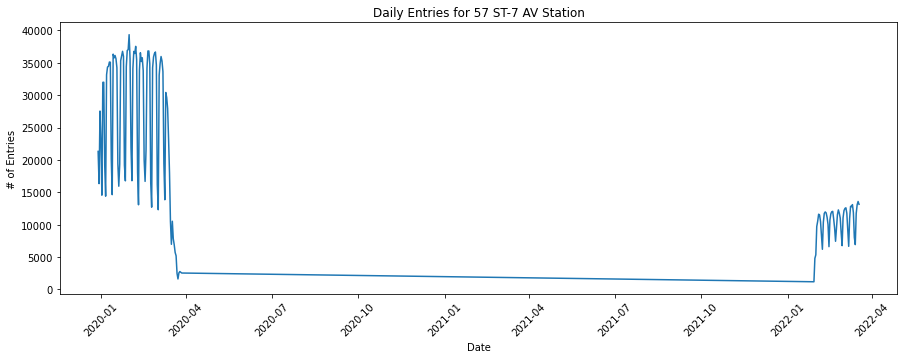

In [38]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')

#### 34 St Penn Station

In [39]:
station_daily_34Penn = station_daily[station_daily['STATION'] == '34 ST-PENN STA']
station_daily_34Penn.head()

,STATION,DATE,DAILY_ENTRIES
8479,34 ST-PENN STA,2019-12-29,100131.0
8480,34 ST-PENN STA,2019-12-30,87920.0
8481,34 ST-PENN STA,2019-12-31,143140.0
8482,34 ST-PENN STA,2020-01-01,128147.0
8483,34 ST-PENN STA,2020-01-02,64273.0


### Counts For One Week / One Station 
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful)

plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [40]:
import numpy as np

#### 57 Ave Station

In [41]:
station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av.head()

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/3233257827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/3233257827.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/3233257827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
11676,57 ST-7 AV,2019-12-29,21314.0,6,52
11677,57 ST-7 AV,2019-12-30,16338.0,0,1
11678,57 ST-7 AV,2019-12-31,27550.0,1,1
11679,57 ST-7 AV,2020-01-01,22820.0,2,1
11680,57 ST-7 AV,2020-01-02,14557.0,3,1


Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

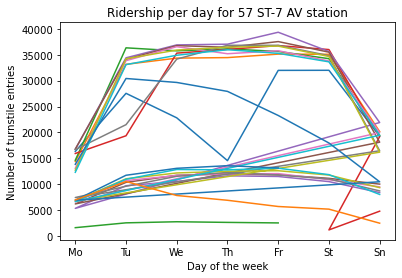

In [42]:
for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

#### 34 St Penn Station

In [43]:
station_daily_34Penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.dayofweek
station_daily_34Penn['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.week
station_daily_34Penn.head()

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/1911361728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34Penn['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.dayofweek
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/1911361728.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  station_daily_34Penn['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34Penn['DATE']).dt.week
/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/1911361728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
8479,34 ST-PENN STA,2019-12-29,100131.0,6,52
8480,34 ST-PENN STA,2019-12-30,87920.0,0,1
8481,34 ST-PENN STA,2019-12-31,143140.0,1,1
8482,34 ST-PENN STA,2020-01-01,128147.0,2,1
8483,34 ST-PENN STA,2020-01-02,64273.0,3,1


#### Assigning Day Name

In [44]:
day_name = station_daily_34Penn['DATE'].dt.day_name()
day_name.head()

8479       Sunday
8480       Monday
8481      Tuesday
8482    Wednesday
8483     Thursday
Name: DATE, dtype: object

#### Get Entries By Day of Week By Specific Station

In [45]:
test_df = station_daily_34Penn.copy()
test_df['DAY_NAME'] = test_df['DATE'].dt.day_name()
test_df2 = test_df.groupby(["DAY_NAME", "STATION", "DAY_OF_WEEK_NUM"]).DAILY_ENTRIES.sum().reset_index()
test_df2.sort_values("DAY_OF_WEEK_NUM", ascending = True, inplace = True)

test_df2

,DAY_NAME,STATION,DAY_OF_WEEK_NUM,DAILY_ENTRIES
1,Monday,34 ST-PENN STA,0,891274.0
5,Tuesday,34 ST-PENN STA,1,1942340.0
6,Wednesday,34 ST-PENN STA,2,2133421.0
4,Thursday,34 ST-PENN STA,3,2056159.0
0,Friday,34 ST-PENN STA,4,2141911.0
2,Saturday,34 ST-PENN STA,5,1982287.0
3,Sunday,34 ST-PENN STA,6,1048951.0


#### Order Days so they can be visualized properly

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/1292348338.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

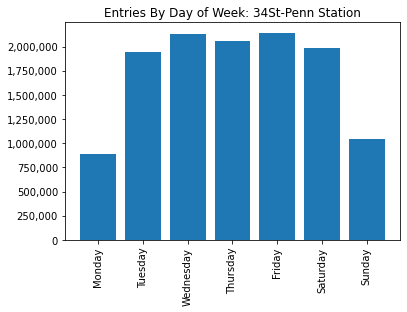

In [46]:
plt.bar(x=test_df2['DAY_NAME'], height=test_df2['DAILY_ENTRIES'])
#after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.title('Entries By Day of Week: 34St-Penn Station')
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.xticks(rotation=90)

### To get an idea about the distribution of total ridership among different stations
Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)
to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)

/var/folders/_0/21d2kw097h912yp8tr3nkrsm0000gn/T/ipykernel_90403/3165013894.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 50.0, '250,000'),
 Text(0, 100.0, '500,000'),
 Text(0, 150.0, '750,000'),
 Text(0, 200.0, '1,000,000'),
 Text(0, 250.0, '1,250,000'),
 Text(0, 300.0, '1,500,000')]

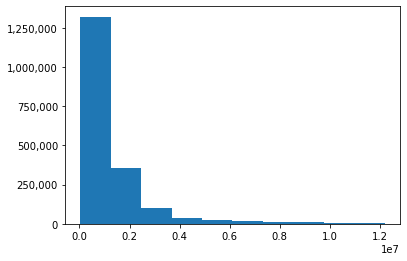

In [47]:
plt.hist(station_totals['DAILY_ENTRIES'])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

### View Top Ten Stations

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

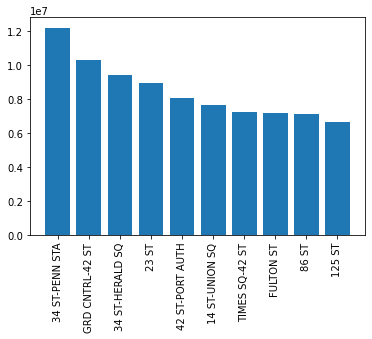

In [48]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)